Download packages

In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
from sklego.meta import OrdinalClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import scipy
from sklearn.metrics import balanced_accuracy_score

In [2]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [3]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Concatenate data

In [4]:
path ='CSV_features_NEW/'
folder = os.fsencode(path)
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]


patient_numbers = []
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(folder):
    filename = os.fsdecode(file)
    patient_numbers.append(filename[0:3])
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    all_data.append(data)



Ignore irrelevant warnings

In [5]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [6]:
print(patient_numbers)

['p10', 'p11', 'p12', 'p13', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p27', 'p28', 'p29', 'p2_', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p3_', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p4_', 'p50', 'p51', 'p52', 'p53', 'p54', 'p56', 'p57', 'p58', 'p59', 'p5_', 'p61', 'p62', 'p63', 'p65', 'p66', 'p67', 'p68', 'p69', 'p6_', 'p71', 'p72', 'p73', 'p74', 'p75', 'p77', 'p78', 'p79', 'p7_', 'p80', 'p8_', 'p9_']


In [7]:
all_data_as_df = pd.concat(all_data)

In [8]:
all_data_as_df

,No.,Event,Delta,Delta_N,Theta,Theta_N,Alpha,Alpha_N,Beta,Beta_N,...,wSMI,Kolmogorov,MeanRR,StdRR,MeanHR,StdHR,MinHR,MaxHR,freq_slope_mean,freq_slope_std
0,0,R,-104.617241,0.018449,-122.538760,0.000879,-125.318795,0.000451,-137.233577,0.000024,...,0.064478,0.619272,742.315789,7.461402,80.825572,0.674236,79.365079,81.967213,-3.079138,0.397364
1,1,R,-106.718577,0.017555,-119.621343,0.001658,-125.188891,0.000300,-136.175104,0.000031,...,0.066045,0.613250,726.600000,6.524448,82.572149,0.588805,81.521739,83.798883,-3.063855,0.341592
2,2,R,-104.768709,0.018057,-118.026845,0.001407,-127.646520,0.000198,-136.036426,0.000026,...,0.075280,0.598062,701.200000,16.826045,85.578587,1.863674,82.417582,89.285714,-3.121247,0.240500
3,0,M,-104.675501,0.017125,-116.677226,0.001794,-122.861214,0.000476,-134.382668,0.000032,...,0.080038,0.612988,710.600000,11.259616,84.458424,1.181598,81.521739,87.209302,-3.084066,0.379106
4,1,M,-104.892675,0.017414,-116.860975,0.001711,-123.792968,0.000368,-135.476382,0.000027,...,0.063433,0.604085,715.600000,8.792341,83.847009,0.865074,82.872928,86.206897,-3.173890,0.277537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,5,F,-108.864513,0.011777,-114.490985,0.003590,-122.194552,0.000688,-124.819324,0.000287,...,0.075303,0.703849,535.692308,106.726855,116.564057,8.387480,102.040816,153.061224,-3.408121,0.318610
19,6,F,-112.684086,0.008901,-114.755134,0.006233,-120.269271,0.001804,-133.402187,0.000109,...,0.076763,0.661692,527.407407,51.711671,114.029077,9.993331,100.000000,159.574468,-3.324694,0.362502
20,7,F,-110.702256,0.016718,-120.759875,0.001954,-127.114925,0.000438,-135.418625,0.000071,...,0.080166,0.627389,525.629630,48.246282,114.420733,9.569551,99.337748,154.639175,-3.486907,0.368683
21,8,F,-109.705416,0.011017,-112.256872,0.005395,-121.581940,0.000639,-128.205515,0.000136,...,0.073158,0.686829,523.407407,45.481407,114.927794,8.382736,102.739726,141.509434,-3.626670,0.346876


In [9]:
#check if the normalization is correct for psd
#data = all_data[0]
#print(data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1))
sums_list = []
for i, data in enumerate(all_data):
    sums = data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1)
    if i == 0:
        print(sums)
    sums_list.append(np.mean(sums))
print(sorted(sums_list))

0     0.019803
1     0.019542
2     0.019688
3     0.019428
4     0.019520
5     0.019490
6     0.019154
7     0.017997
8     0.019124
9     0.018832
10    0.019099
11    0.018687
12    0.018877
13    0.019161
14    0.019246
15    0.019700
16    0.018670
17    0.019357
18    0.018910
19    0.019201
20    0.018831
21    0.019236
22    0.018859
dtype: float64
[0.009801334023084021, 0.014794518297275953, 0.014833318015524413, 0.015345013510980042, 0.015434825144028405, 0.015508582303188388, 0.01589885428565016, 0.01603417123714834, 0.01612466312823767, 0.016205420780115488, 0.01644244060112744, 0.016513762539171396, 0.016516248171477295, 0.016671153774524182, 0.016730648052194395, 0.016963096120857536, 0.01699586312485966, 0.01702582832606859, 0.017074660803070664, 0.017078430166386174, 0.017109734954274935, 0.017290545912566003, 0.01737480555662817, 0.017587792212366917, 0.01759398227796191, 0.017622690088096228, 0.01764260541366203, 0.017654618748449143, 0.017681984494064083, 0.01769257

In [ ]:
alpha/(sum(alpha+beta+theta+delta))

In [10]:
A = set()
B = set()
C = set()
D = set()
numbers = []
for i, data in enumerate(all_data):
    
    if np.min(data['Delta']) < -300:
        A.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Theta']) < -300:
        B.add(patient_numbers[i])
    if np.min(data['Alpha']) < -300:
        C.add(patient_numbers[i])
    if np.min(data['Beta']) < -300:
        D.add(patient_numbers[i])
print(sorted(A&B&C&D))
print(sorted(A))
print(sorted(B))
print(sorted(C))
print(sorted(D))
#['p25', 'p31', 'p34', 'p38', 'p61', 'p67', 'p68', 'p77']


[]
[]
[]
[]
[]


In [19]:
A1 = set()
B1 = set()
C1 = set()
D1 = set()
E1 = set()
numbers = []
for i, data in enumerate(all_data):
    '', '', '', 'wSMI'
    if np.min(data['MSF']) == 0.0:
        A1.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Sef90']) == 0.0:
        B1.add(patient_numbers[i])
    if np.min(data['Sef95']) == 0.0:
        C1.add(patient_numbers[i])
    if np.min(data['PE']) == 0.0:
        D1.add(patient_numbers[i])
    if np.min(data['wSMI']) == 0.0:
        E1.add(patient_numbers[i])
print(sorted(A1&B1&C1&D1&E1))
print(sorted(A1))
print(sorted(B1))
print(sorted(C1))
print(sorted(D1))
print(sorted(E1))

[]
[]
[]
[]
[]
[]


In [20]:
for i in numbers:
    print(all_data[i]['MeanRR'])

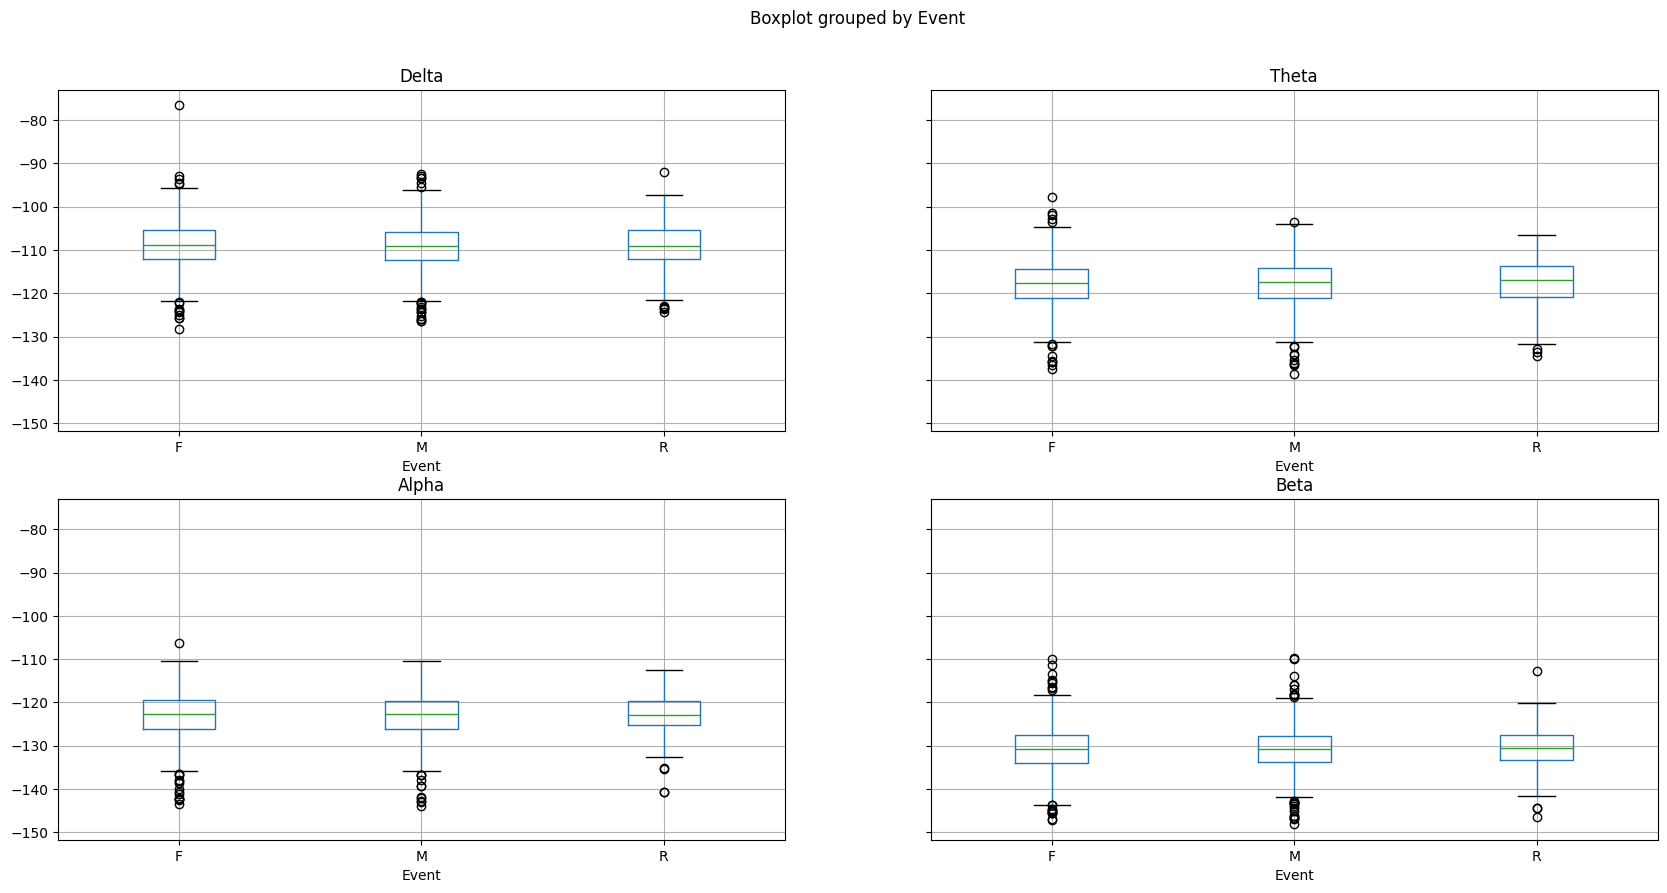

In [21]:
all_data_as_df.boxplot(column=['Delta','Theta', 'Alpha','Beta'], by='Event', figsize=(20,10),sharex=False)
plt.show()

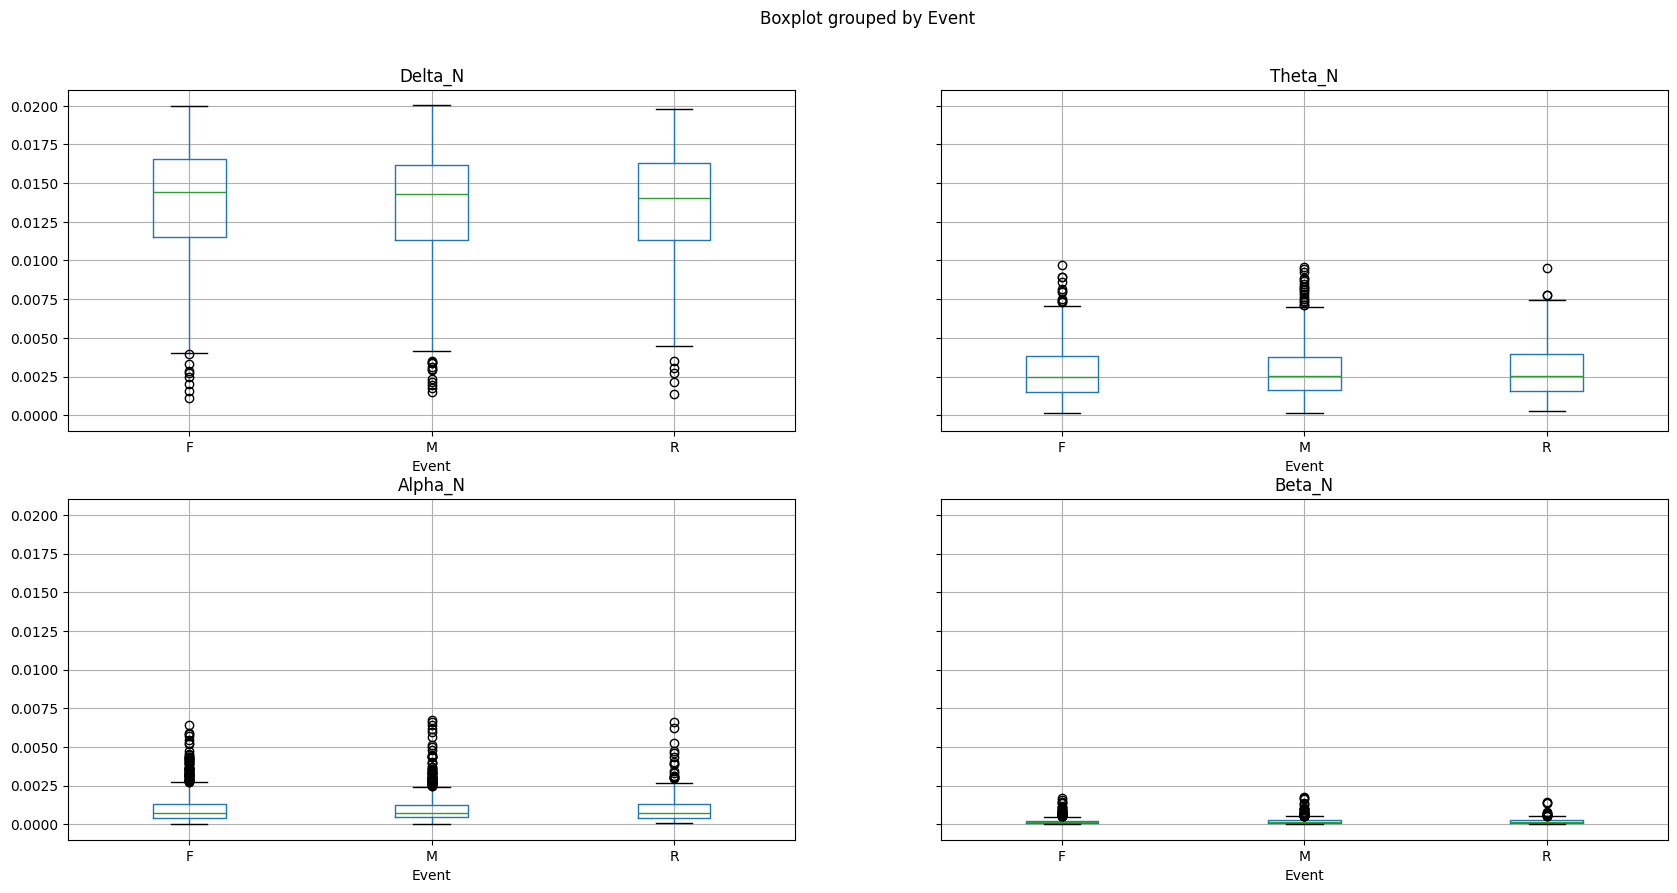

In [22]:
all_data_as_df.boxplot(column=['Delta_N','Theta_N', 'Alpha_N','Beta_N'], by='Event', figsize=(20,10), sharex=False)
plt.show()

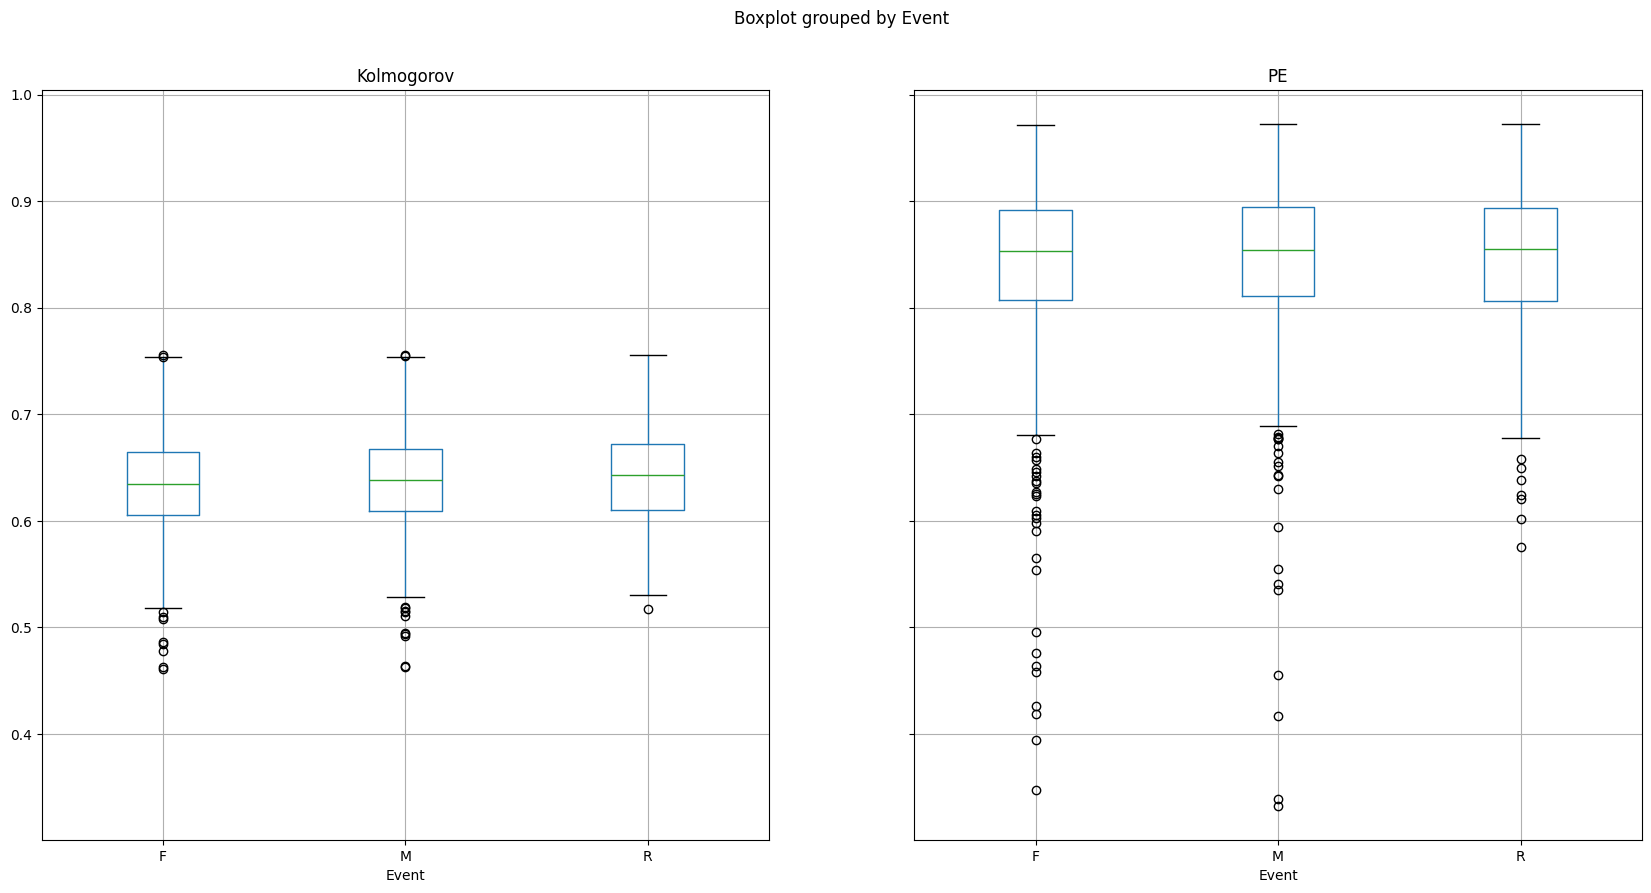

In [23]:
all_data_as_df.boxplot(column=['Kolmogorov', 'PE'], by='Event', figsize=(20,10), sharex=False)
plt.show()

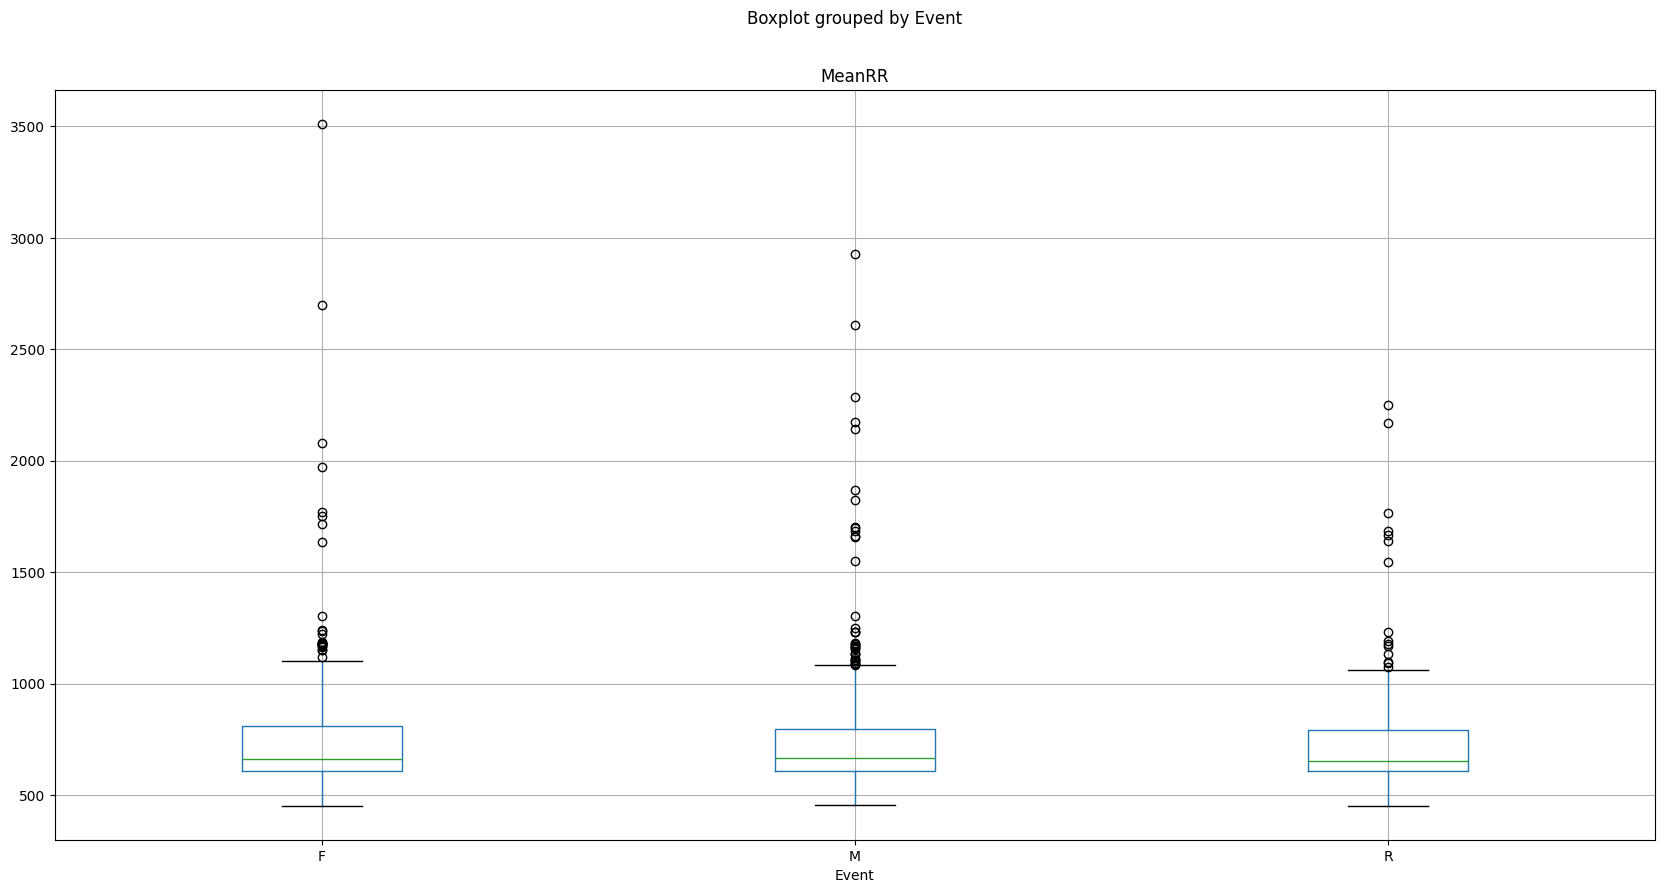

In [14]:
all_data_as_df.boxplot(column=['MeanRR'], by='Event', figsize=(20,10))
plt.show()

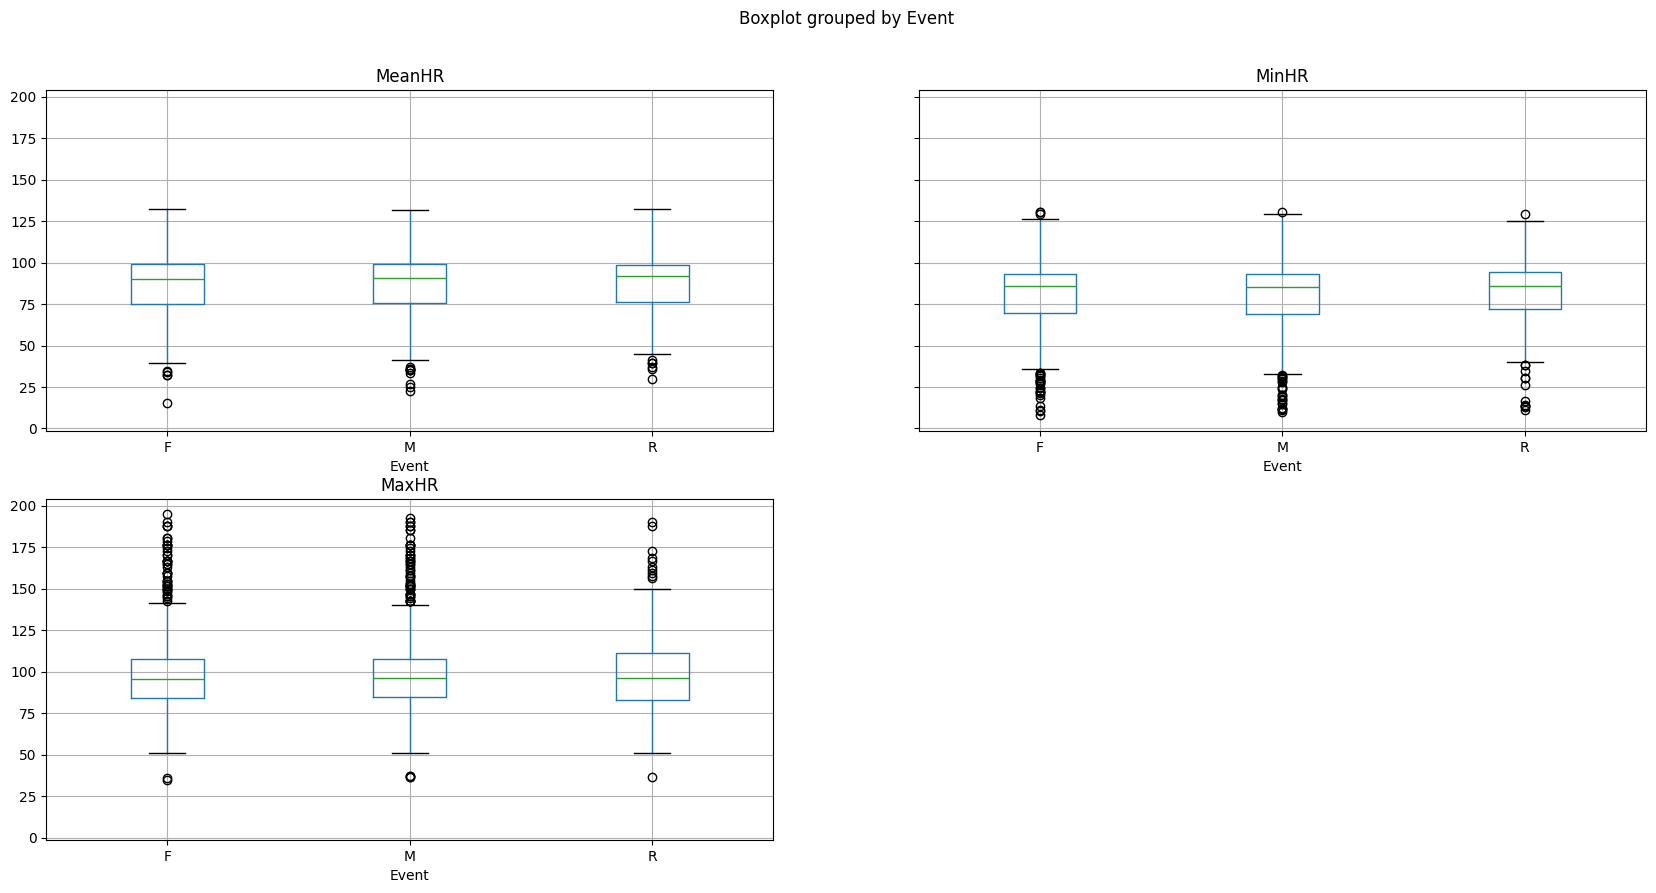

In [24]:
all_data_as_df.boxplot(column=['MeanHR', 'MinHR', 'MaxHR'], by='Event', figsize=(20,10), sharex=False)
plt.show()

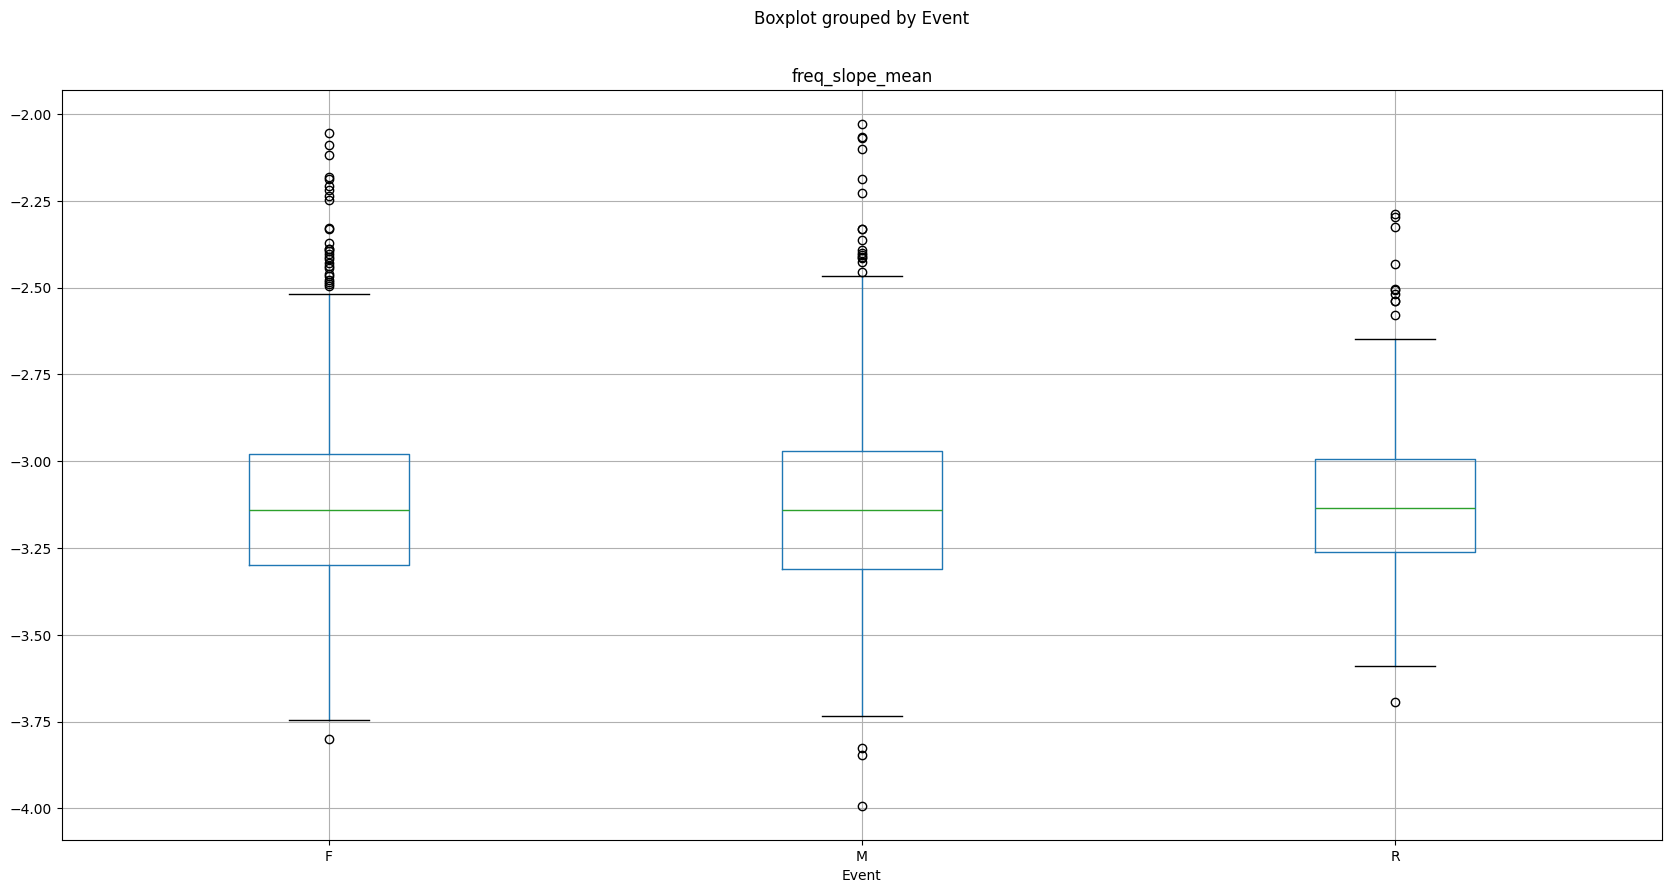

In [16]:
all_data_as_df.boxplot(column=['freq_slope_mean'], by='Event', figsize=(20,10))
plt.show()


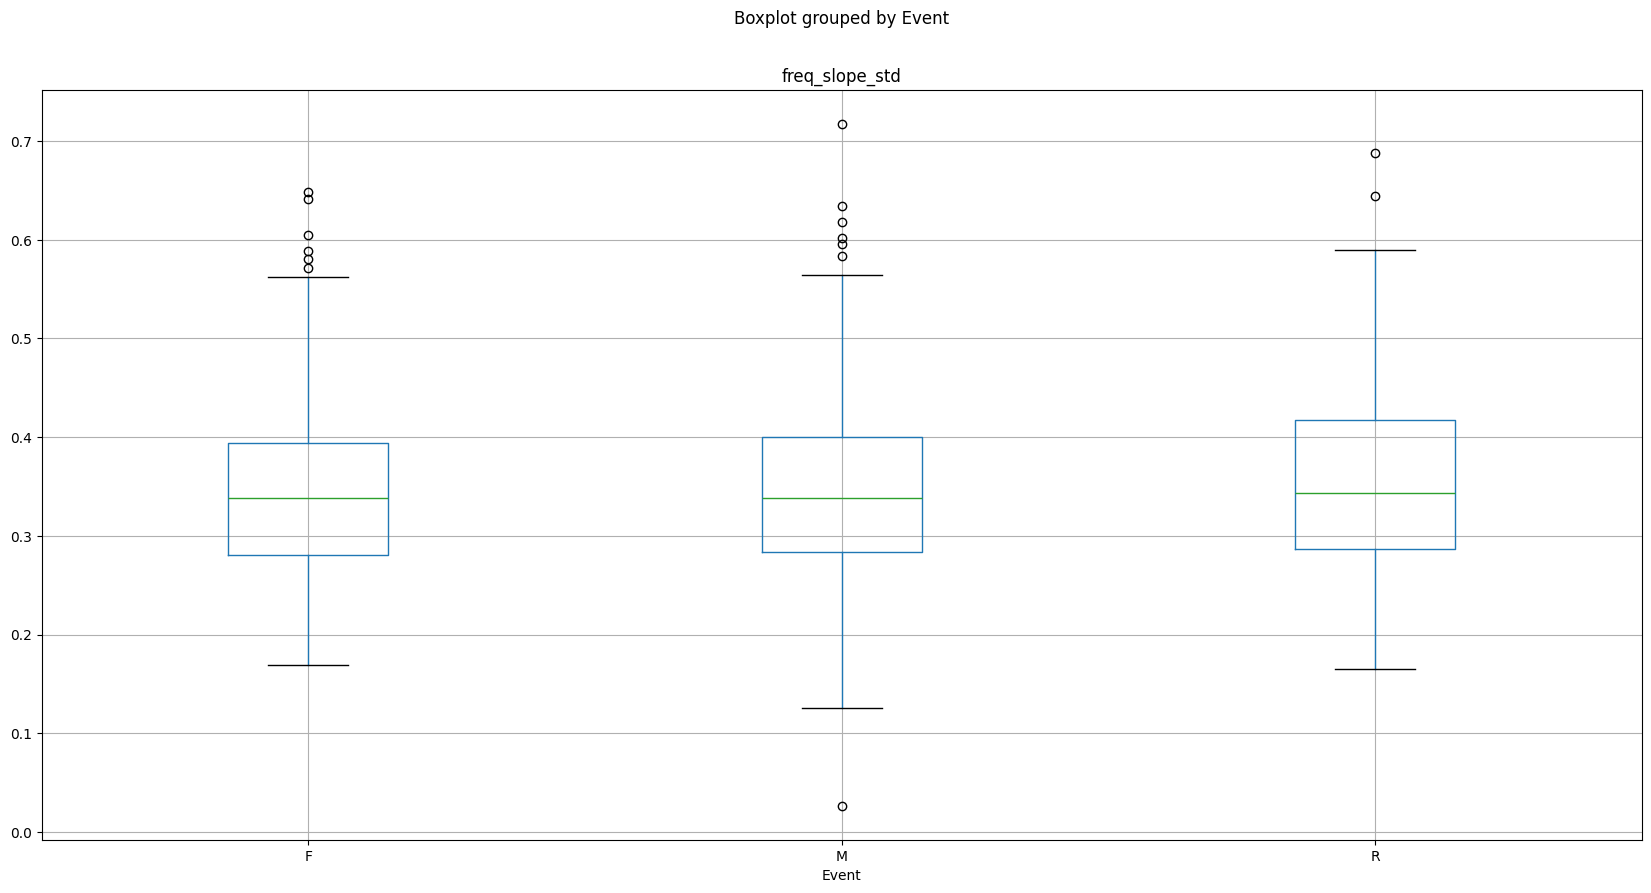

In [17]:
all_data_as_df.boxplot(column=['freq_slope_std'], by='Event', figsize=(20,10))
plt.show()